In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib as mpl
import pandas as pd
import xarray as xr
import sys
sys.path.insert(0, '../lib')
sys.path.insert(0, '../src')

import ml_estimation as ml
import model1_plots as mp
import model1 as mod1
from scipy.stats import norm, beta
from statsmodels.base.model import GenericLikelihoodModel


In [2]:
df = pd.read_csv('../mod/test/example_bin_data.csv')
df_bin_fit = pd.read_csv('../mod/test/examble_bin_fit.csv')

In [3]:
df_bin_fit.head()

,Unnamed: 0,bincenter_h,bincenter_d,alpha,beta,conv_b,alpha1,beta1,alpha2,beta2,p,conv_mb,mu,sigma,p_cs
0,0,1000.0,0,1.699652,7.538766,True,1.699656e+00,7.538772e+00,NaN,NaN,1.000000,True,0.343852,1.097610,0.200000
1,1,6000.0,0,2.162252,3.194781,True,1.017489e+13,4.188236e+13,2.461819e+13,1.544830e+13,0.563518,False,0.062487,0.022937,0.000000
2,2,12000.0,0,61.951964,22.897446,True,6.195200e+01,2.289745e+01,NaN,NaN,1.000000,True,0.174865,1.040439,0.000000
3,3,1000.0,1,1.056136,5.614694,True,1.881068e+01,2.109343e+02,1.210301e+13,6.064222e+12,0.891649,False,1.107455,0.855094,0.090909
4,4,6000.0,1,30.151377,48.183160,True,2.443220e+01,3.903855e+01,NaN,NaN,1.000000,True,1.190957,0.622828,0.000000


In [4]:
df.head()


,Unnamed: 0,Unnamed: 0.1,h_t,d_t,ct,cloud,h_t_next,d_t_next,ct_next,cloud_next,dh,dd,bincenter_h,bincenter_d
0,937,937,1079.810669,-0.003822,2.0,cloud,5150.312500,-0.997810,3.0,cloud,4070.501831,-0.993987,1000.0,0
1,2001,2001,1083.778320,0.017997,2.0,cloud,1102.090576,0.232953,2.0,cloud,18.312256,0.214957,1000.0,0
2,2812,2812,1031.893677,0.013189,2.0,cloud,3910.575195,2.288663,6.0,cloud,2878.681519,2.275474,1000.0,0
3,2952,2952,858.843201,0.082985,2.0,cloud,446.513031,0.354812,2.0,cloud,-412.330170,0.271827,1000.0,0
4,3259,3259,821.913574,0.008358,2.0,cloud,3850.755127,0.227134,3.0,cloud,3028.841553,0.218776,1000.0,0


1000.0 0.0


C:\Users\nerin\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:881: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asarray(arg) > 0))
C:\Users\nerin\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:881: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asarray(arg) > 0))


6000.0 0.0
12000.0 0.0


C:\Users\nerin\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:881: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asarray(arg) > 0))
C:\Users\nerin\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:881: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asarray(arg) > 0))


1000.0 1.0
6000.0 1.0


C:\Users\nerin\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:881: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asarray(arg) > 0))
C:\Users\nerin\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:881: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asarray(arg) > 0))


12000.0 1.0


C:\Users\nerin\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:881: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asarray(arg) > 0))
C:\Users\nerin\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:881: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asarray(arg) > 0))


6000.0 2.0


C:\Users\nerin\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:881: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asarray(arg) > 0))
C:\Users\nerin\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:881: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asarray(arg) > 0))


9000.0 2.0
12000.0 3.0


C:\Users\nerin\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:881: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asarray(arg) > 0))
C:\Users\nerin\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:881: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asarray(arg) > 0))


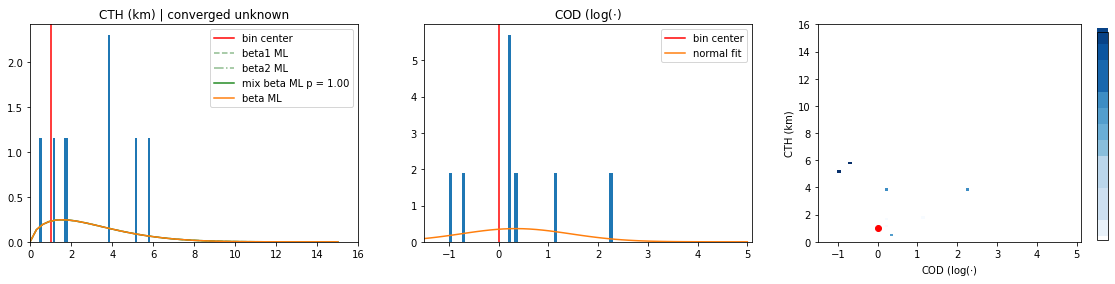

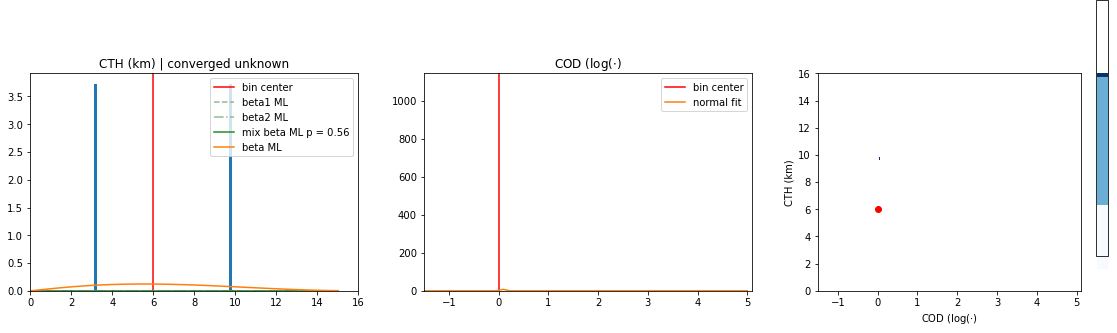

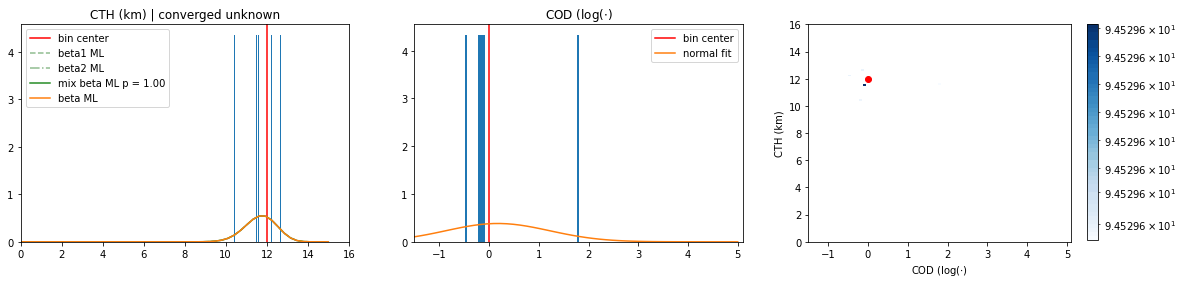

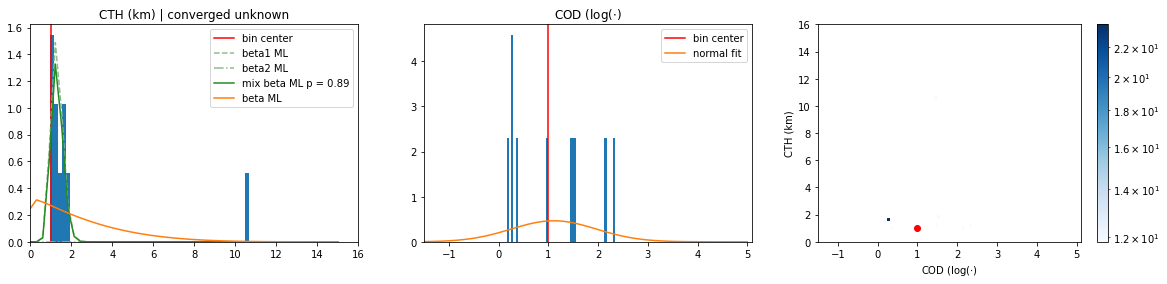

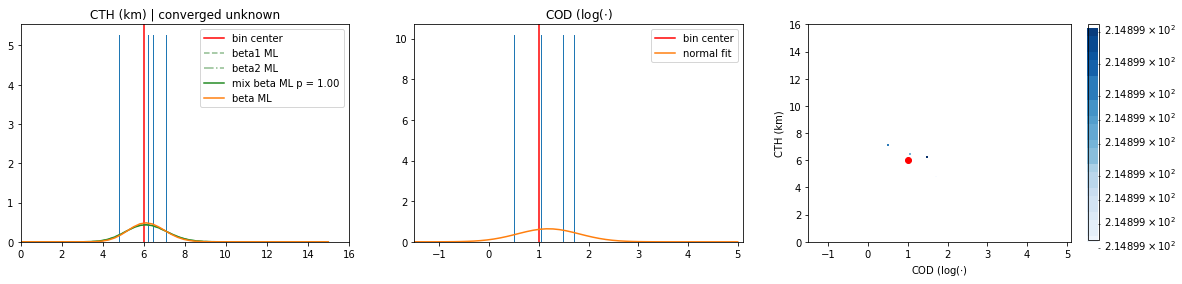

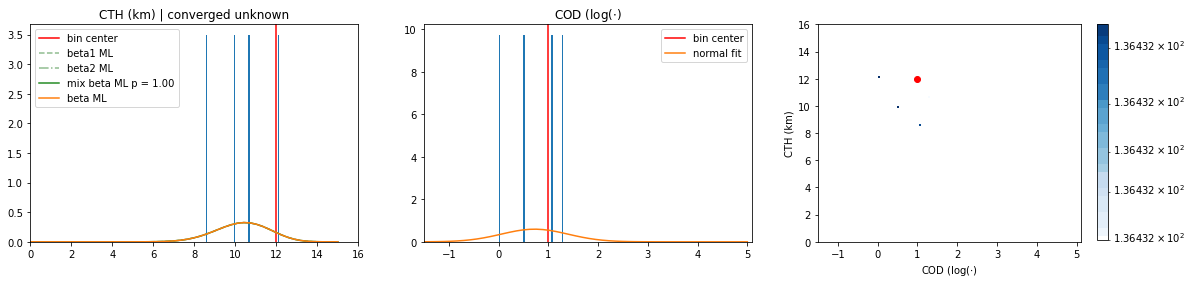

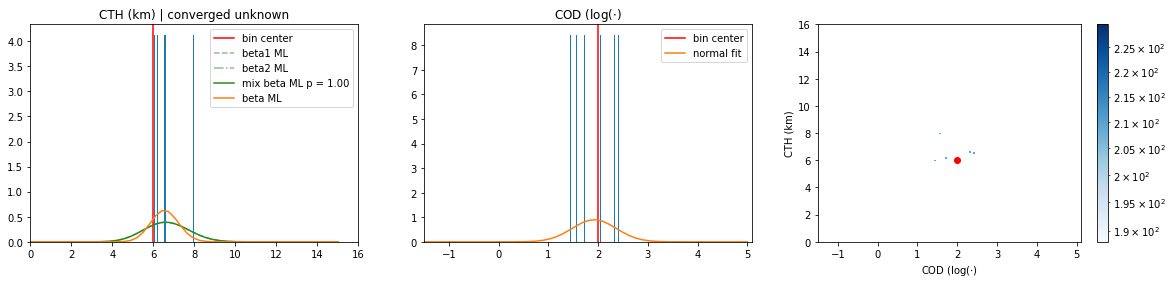

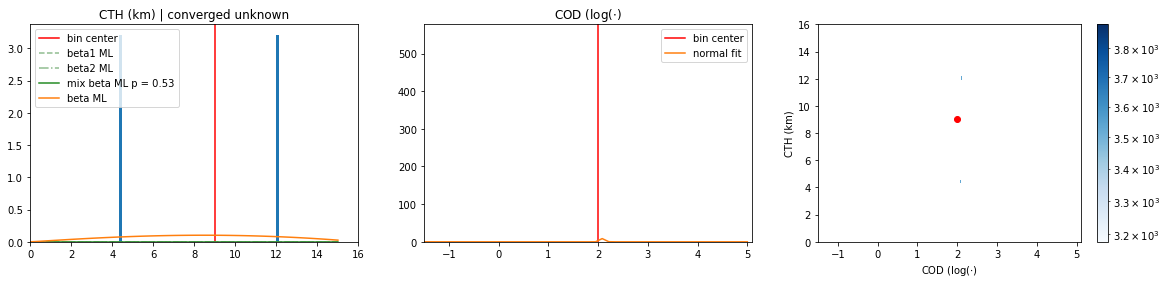

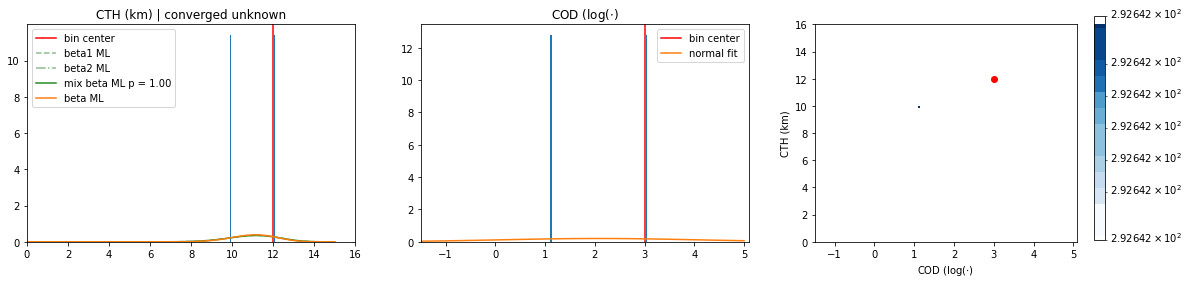

In [6]:

for idx, (h,d) in df_bin_fit[['bincenter_h', 'bincenter_d']].iterrows():
    df_bin = df.loc[(df.bincenter_h == h) & (df.bincenter_d == d)]
    param = df_bin_fit.loc[(df_bin_fit.bincenter_h == h) & (df_bin_fit.bincenter_d == d)]
    print(h,d)
    fig , ax = mp.plot_distribution_next_cloud(df_bin, ML = False, density = True) # histograms cth, cod, joint

    # bin centers
    ax[0].axvline(h*1e-3, color = 'r', label = 'bin center')
    ax[1].axvline(d, color = 'r', label = 'bin center')
    ax[2].plot(d, h*1e-3,'ro', label = 'bin center')

    # fits
    # cod
    D = np.linspace(-1.5, 5, 50)
    H = np.linspace(0, 15e3, 50)
    H_norm = ml.CTHtoUnitInt(H)

    h_beta_fit = beta(param.alpha, param.beta).pdf(H_norm)
    p = param.p.values[0] 
    
    ax[0].plot(H * 1e-3, ml.pdf_b(H_norm, param.alpha1, param.beta1) / 15, '--',
               color = 'darkseagreen', 
               label = f'beta1 ML')
    ax[0].plot(H * 1e-3, ml.pdf_b(H_norm, param.alpha2, param.beta2) / 15, '-.',
               color = 'darkseagreen',
               label = f'beta2 ML')
    ax[0].plot(H * 1e-3, ml.pdf_bmix(H_norm, param.alpha1, param.beta1, param.alpha2, param.beta2, p) / 15, 
               color = 'forestgreen',
               label = f'mix beta ML p = {p:.2f}')
    
    ax[0].plot(H * 1e-3, h_beta_fit / 15, label = 'beta ML')
    ax[0].legend()

    d_fit = norm(param.mu,param.sigma).pdf(D)
    ax[1].plot(D, d_fit, label = 'normal fit')
    ax[1].legend()
    
    fig.savefig(f'../fig/model1/example_bins{idx}.png')
#     plt.close()



## local behaviour parameters

In [8]:
ds = xr.open_dataset('../mod/test/expl_local_param.nc')
ds

<xarray.Dataset>
Dimensions:  (mu_d: 17, mu_h: 44)
Coordinates:
  * mu_h     (mu_h) float64 1e+03 1.3e+03 1.6e+03 ... 1.33e+04 1.36e+04 1.39e+04
  * mu_d     (mu_d) float64 -1.0 -0.7 -0.4 -0.1 0.2 0.5 ... 2.6 2.9 3.2 3.5 3.8
Data variables: (12/14)
    p_cs     (mu_h, mu_d) float64 ...
    n_bin    (mu_h, mu_d) float64 ...
    mu       (mu_h, mu_d) float64 ...
    sigma    (mu_h, mu_d) float64 ...
    n        (mu_h, mu_d) float64 ...
    alpha    (mu_h, mu_d) float64 ...
    ...       ...
    beta1    (mu_h, mu_d) float64 ...
    alpha2   (mu_h, mu_d) float64 ...
    beta2    (mu_h, mu_d) float64 ...
    p        (mu_h, mu_d) float64 ...
    conv_b   (mu_h, mu_d) float64 ...
    conv_mb  (mu_h, mu_d) float64 ...
Attributes:
    dh:       300
    dd:       0.3
    p_cscs:   0.7324613555291319

NameError: name 'mu1' is not defined

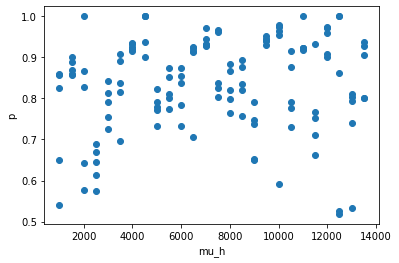

In [23]:
def meanBeta(alpha, beta):
    return alpha / (alpha + beta)
ds.plot.scatter('mu_h','p')
plt.plot(mu_h, mu1.data.reshape((n_d, n_h)).T)

Text(0.5, 0.98, 'Estimators of time distribution COD')

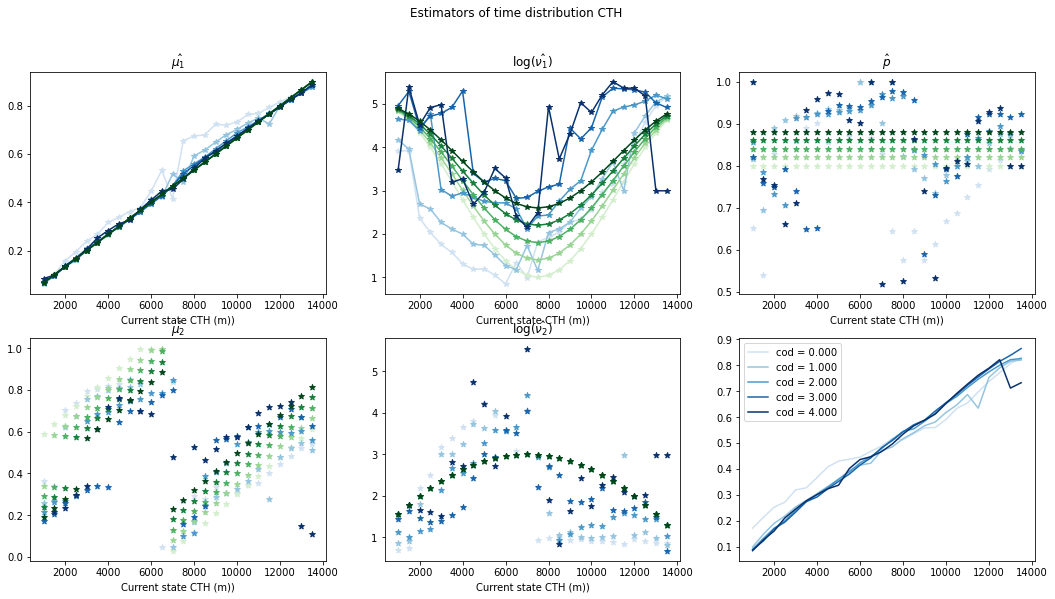

C:\Users\nerin\anaconda3\lib\site-packages\matplotlib\colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


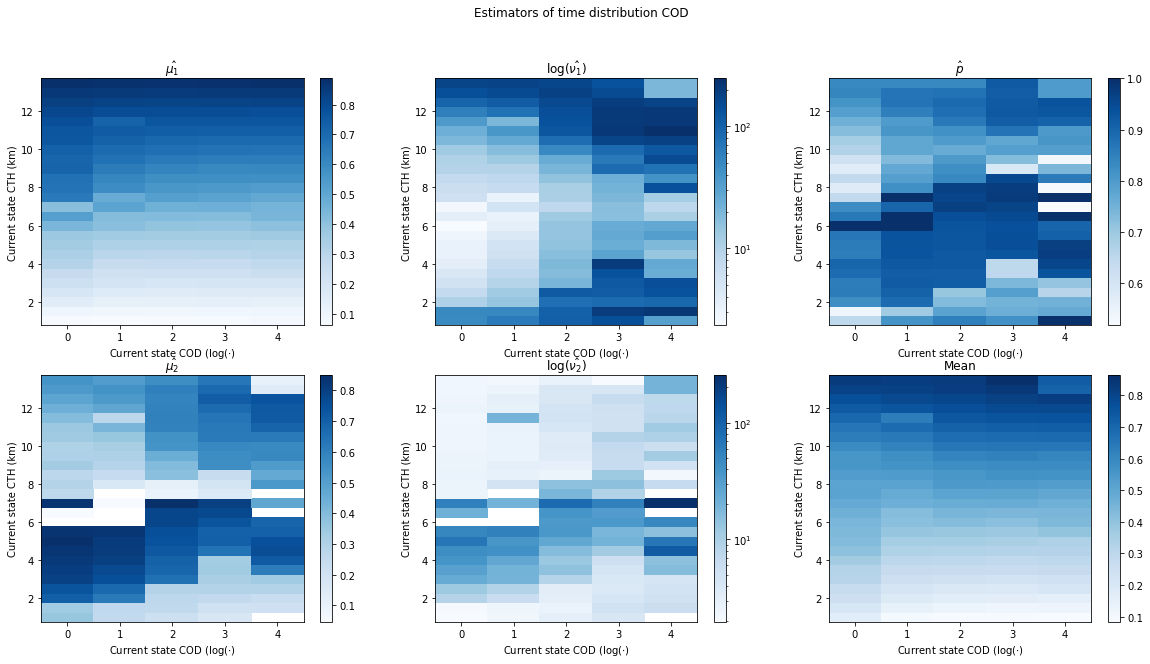

In [61]:
# cod estimators normal distribution
dh = ds.dh
dd = ds.dd
mu_h = ds.mu_h # m
mu_d = ds.mu_d
n_h = len(mu_h)
n_d = len(mu_d)
mu_h_ = np.append(mu_h - dh/2, mu_h.max() + dh/2) ## for pcolormesh
mu_d_ = np.append(mu_d - dd/2, mu_d.max() + dd/2) ## for pcolormesh
h_labels = [f'cod = {d:.3f}' for d in mu_d.data]

    
color= cm.Blues(np.linspace(.2,1, n_d))
color_ml= cm.Greens(np.linspace(.2,1, n_d))

    

fig, ax = plt.subplots(2, 3, figsize = (18, 9))


mu1 = meanBeta(ds.alpha1, ds.beta1)
nu1 = ds.alpha1 + ds.beta1
mu2 = meanBeta(ds.alpha2, ds.beta2)
nu2 = ds.alpha2 + ds.beta2
p = ds.p 

### verkeerd om ! fix TODO
mu1 = mu1.data.reshape((n_d, n_h)).T
nu1 = nu1.data.reshape((n_d, n_h)).T
mu2 = mu2.data.reshape((n_d, n_h)).T
nu2 = nu2.data.reshape((n_d, n_h)).T
p = p.data.reshape((n_d, n_h)).T

#start param global 
def mu1_est(h, d):
    return h / ml.h_max

gamma1 = np.array([5, 2 * np.pi / ml.h_max , 3, .2])

def nu1_est(h, d, gamma1 = gamma1):
    a = gamma1[2] + gamma1[3] *d
    return (gamma1[0] - a) * np.cos(gamma1[1] * h) + a

a = np.array([.8, .02])

def prob(h, d, a = a):
    return a[0] + a[1] * d

ab = np.array([.9e-4, .3, .5, -.6, -.05, .35, 7e3])

def mu2_est(h, d, ab = ab):
    a = ab[:5]
    b = ab[5:7]
    
    if a[1] + a[4] * d + a[0] * h < b[0]:
        out = a[1] + a[4] * d + a[0] * h 
    elif h < b[1]:
        out = a[2] + a[4] * d + a[0] * h
    else:
        out = a[3] - a[4] * d + a[0] * h
    
    if out <= 0:
        out = .001
    elif out >= 1:
        out = .999
    return out
    
gamma2 = np.array([-2/5 *1e-7, 3])

def nu2_est(h, d, gamma2 = gamma2):
    return gamma2[0] * (h - 7e3) ** 2 + gamma2[1]



mean = np.nansum(np.dstack((p * mu1,(1 - p) * mu2)),2)

title = ['$\\hat{\\mu_1}$', '$\\log(\\hat{\\nu_1})$', '$\\hat{p}$', 
         '$\\hat{\\mu_2}$', '$\\log(\\hat{\\nu_2})$', 'Mean']

for i, c, c_ml, label in zip(range(n_d), color, color_ml, h_labels):
    ax[0,0].plot(mu_h, mu1[:,i], label = label, c = c, 
                marker = '*', 
               # ls = '--'
               )
    ax[0,0].plot(mu_h, mu1_est(mu_h, mu_d[i]), label = label + ' start_param', c = c_ml, 
                marker = '*', 
               # ls = '--'
               )
    ax[0,1].plot(mu_h, np.log(nu1[:,i]), label = label, c = c,
                marker = '*', 
               # ls = '--'
               )
    ax[0,1].plot(mu_h, nu1_est(mu_h,mu_d[i]), label = label, c = c_ml,
                marker = '*', 
               # ls = '--'
               )
#     ax[0,1].set(yscale = 'log')
    ax[0,2].scatter(mu_h, p[:,i], label = label, color = c,
                marker = '*', 
               # ls = '--'
               )
#     ax[0,2].scatter(mu_h, np.array([p[:,i].mean() for hi in mu_h]), label = label, color = c,
# #                 marker = '*', 
#                # ls = '--'
#                )    
    ax[0,2].scatter(mu_h, np.array([prob(hi, mu_d[i]) for hi in mu_h]), label = label, color = c_ml,
                marker = '*', 
               # ls = '--'
               )
    ax[1,0].scatter(mu_h, mu2[:,i], label = label, color = c,
                marker = '*', 
               # ls = '--'
               )
    ax[1,0].scatter(mu_h, np.array([mu2_est(hi, mu_d[i]) for hi in mu_h]), label = label, color = c_ml,
                marker = '*', 
               # ls = '--'
               )
    ax[1,1].scatter(mu_h, np.log(nu2[:,i]), label = label, color = c,
                marker = '*', 
               # ls = '--'
               )
    ax[1,1].scatter(mu_h, nu2_est(mu_h, mu_d[i]), label = label, color = c_ml,
                marker = '*', 
               # ls = '--'
               )
#     ax[1,1].set(yscale = 'log')

    ax[1,2].plot(mu_h, mean[:,i], label = label, c = c)
    ax[1,2].legend()

for axs, titles in zip(ax.flatten()[:-1], title):
    axs.set(xlabel = 'Current state CTH (m))',
          # ylabel = '$\hat{\mu_d}$',
          title = titles)
#     if titles != '$\\hat{p}$':
#         axs.set(yscale = 'log')
    


fig.suptitle('Estimators of time distribution CTH')


fig, ax = plt.subplots(2, 3, figsize = (20, 10))

im = ax[0,0].pcolormesh(mu_d_, mu_h_ * 1e-3, mu1, cmap = cm.Blues)
plt.colorbar(im, ax=ax[0,0],
             # label = title[0]
             )

im = ax[0,1].pcolormesh(mu_d_, mu_h_ * 1e-3, nu1, cmap = cm.Blues,
                        norm=mpl.colors.LogNorm()
                       )
plt.colorbar(im, ax=ax[0,1],
             # label = title[1]
             )
im = ax[0,2].pcolormesh(mu_d_, mu_h_ * 1e-3, p, cmap = cm.Blues)
plt.colorbar(im, ax=ax[0,2],
             # label = title[2]
             )
im = ax[1,0].pcolormesh(mu_d_, mu_h_ * 1e-3, mu2, cmap = cm.Blues)
plt.colorbar(im, ax=ax[1,0],
             # label = title[3]
             )
im = ax[1,1].pcolormesh(mu_d_, mu_h_ * 1e-3, nu2, cmap = cm.Blues,
                        norm=mpl.colors.LogNorm()
                       )
plt.colorbar(im, ax=ax[1,1],
             # label = title[4]
             )
im = ax[1,2].pcolormesh(mu_d_, mu_h_ * 1e-3, mean, cmap = cm.Blues)
plt.colorbar(im, ax=ax[1,2],
             # label = title[0]
             )

for axs, title in zip(ax.flatten()[:len(title)], title):
    axs.set(xlabel = 'Current state COD (log($\cdot$)',
          ylabel = 'Current state CTH (km)',
          title = title)

fig.suptitle('Estimators of time distribution COD')

In [6]:
print('cth global fit')
## ml estimation COD deep params
model1_cth = ml.MyDepMixBetaML(df.h_t_next,df[['h_t', 'd_t']])
sm_ml_cth = model1_cth.fit()
df_cth = pd.DataFrame(sm_ml_cth._cache)
df_cth['coef'] = sm_ml_cth.params
df_cth['names'] = model1_cth.exog_names
df_cth.to_csv(loc_model1 + 'model1_cth.csv')
    

cth global fit
[ 5.0000000e+00  4.1887902e-04  3.0000000e+00  2.0000000e-01
  8.0000000e-01  2.0000000e-02  9.0000000e-05  3.0000000e-01
  5.0000000e-01 -6.0000000e-01 -5.0000000e-02  3.5000000e-01
  7.0000000e+03 -4.0000000e-08  3.0000000e+00]
[ 5.2500000e+00  4.1887902e-04  3.0000000e+00  2.0000000e-01
  8.0000000e-01  2.0000000e-02  9.0000000e-05  3.0000000e-01
  5.0000000e-01 -6.0000000e-01 -5.0000000e-02  3.5000000e-01
  7.0000000e+03 -4.0000000e-08  3.0000000e+00]
[ 5.00000000e+00  4.39822972e-04  3.00000000e+00  2.00000000e-01
  8.00000000e-01  2.00000000e-02  9.00000000e-05  3.00000000e-01
  5.00000000e-01 -6.00000000e-01 -5.00000000e-02  3.50000000e-01
  7.00000000e+03 -4.00000000e-08  3.00000000e+00]
[ 5.0000000e+00  4.1887902e-04  3.1500000e+00  2.0000000e-01
  8.0000000e-01  2.0000000e-02  9.0000000e-05  3.0000000e-01
  5.0000000e-01 -6.0000000e-01 -5.0000000e-02  3.5000000e-01
  7.0000000e+03 -4.0000000e-08  3.0000000e+00]
[ 5.0000000e+00  4.1887902e-04  3.0000000e+00  2.1

../lib\ml_estimation.py:53: RuntimeWarning: divide by zero encountered in log
  return np.log(H).sum()


[ 4.93393135e+00  4.72515085e-04  2.85377554e+00  3.70410114e-01
  8.18018201e-01  2.63442236e-02  1.11705903e-04  2.01638244e-01
  1.12421084e-01 -8.86504973e-01 -5.27407724e-02  3.10332121e-01
  6.31015570e+03 -1.22424104e-05  2.02226097e+00]
[ 4.93393135e+00  4.48101023e-04  2.85377554e+00  3.70410114e-01
  8.18018201e-01  2.63442236e-02  1.11705903e-04  2.01638244e-01
  1.12421084e-01 -8.86504973e-01 -5.27407724e-02  3.10332121e-01
  6.31015570e+03  1.21716521e-05  2.02226097e+00]
[ 4.93393135e+00  4.48101023e-04  2.85377554e+00  3.70410114e-01
  8.18018201e-01  2.63442236e-02  1.11705903e-04  2.01638244e-01
  1.12421084e-01 -8.86504973e-01 -5.27407724e-02  3.10332121e-01
  6.31015570e+03 -1.22424104e-05  2.02226097e+00]
[ 4.93393135e+00  4.72515085e-04  2.85377554e+00  3.70410114e-01
  8.18018201e-01  2.63442236e-02  1.11705903e-04  2.01638244e-01
  1.12421084e-01 -8.86504973e-01 -5.27407724e-02  3.10332121e-01
  6.31015570e+03 -3.53791260e-08  2.02250783e+00]
[ 4.93393135e+00  4.

../lib\ml_estimation.py:237: RuntimeWarning: overflow encountered in exp
  nu2 = np.exp(lognu2)
../lib\ml_estimation.py:239: RuntimeWarning: invalid value encountered in subtract
  beta2 = nu2 - alpha2
C:\Users\nerin\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:881: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asarray(arg) > 0))


[ 4.93393135e+00  4.60308054e-04  2.85377554e+00  3.70410114e-01
  8.18018201e-01  2.63442236e-02  1.11705903e-04  2.01638244e-01
  1.12421084e-01 -8.86504973e-01 -5.27407724e-02  3.10332121e-01
  6.31015570e+03 -3.53791260e-08  2.02226097e+00]
[ 4.93393135e+00  4.60308054e-04  2.85377554e+00  3.70410114e-01
  8.18018201e-01  2.63442236e-02  1.11705903e-04  2.01638244e-01
  1.12421084e-01 -8.86504973e-01 -5.27407724e-02  3.10332121e-01
  6.31015570e+03 -3.53791260e-08  2.02226097e+00]
[ 4.93393135e+00  4.60308054e-04  2.85377554e+00  3.70410114e-01
  8.18018201e-01  2.63442236e-02  1.11705903e-04  2.01638244e-01
  1.12421084e-01 -8.86504973e-01 -5.27407724e-02  3.10332121e-01
  6.31015570e+03 -2.44494416e-05  2.02226097e+00]
[ 4.93393135e+00  4.60308054e-04  2.85377554e+00  3.70410114e-01
  8.18018201e-01  2.63442236e-02  1.11705903e-04  2.01638244e-01
  1.12421084e-01 -8.86504973e-01 -5.27407724e-02  3.10332121e-01
  6.31015570e+03  1.21716521e-05  2.02250783e+00]
[ 4.93393135e+00  4.

C:\Users\nerin\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\nerin\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


NameError: name 'loc_model1' is not defined

In [7]:
print(sm_ml_cth.summary())

[ 4.93393135e+00  4.60308054e-04  2.85377554e+00  3.70410114e-01
  8.18018201e-01  2.63442236e-02  1.11705903e-04  2.01638244e-01
  1.12421084e-01 -8.86504973e-01 -5.27407724e-02  3.10332121e-01
  6.31015570e+03 -3.53791260e-08  2.02226097e+00]
                            MyDepMixBetaML Results                            
Dep. Variable:               h_t_next   Log-Likelihood:                 66458.
Model:                 MyDepMixBetaML   AIC:                        -1.329e+05
Method:            Maximum Likelihood   BIC:                        -1.329e+05
Date:                Thu, 16 Dec 2021                                         
Time:                        16:29:59                                         
No. Observations:               53698                                         
Df Residuals:                   53696                                         
Df Model:                           1                                         
                 coef    std err          z 

C:\Users\nerin\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [12]:
print(sm_ml_cth.summary())
df_cth.to_csv(f'../mod/model1/model1_cth.csv')


                            MyDepMixBetaML Results                            
Dep. Variable:               h_t_next   Log-Likelihood:                 66458.
Model:                 MyDepMixBetaML   AIC:                        -1.329e+05
Method:            Maximum Likelihood   BIC:                        -1.329e+05
Date:                Fri, 17 Dec 2021                                         
Time:                        09:50:12                                         
No. Observations:               53698                                         
Df Residuals:                   53696                                         
Df Model:                           1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gamma10        4.9339        nan        nan        nan         nan         nan
gamma11        0.0005        nan        nan        n

## clear sky to cloud

## cloud to clear sky

In [8]:
ds_cs = xr.open_dataset('../mod/model1/p_cs_param_local.nc')
cs_fit = pd.read_csv('../mod/model1/model1_p_cs.csv')
ds_cs
n_d = ds_cs.dims['mu_d']
n_h = ds_cs.dims['mu_h']
p_cs = ds_cs.p_cs.data.reshape((n_d, n_h)).T
cs_params = cs_fit.coef.values

In [35]:
ds_cs.n_bin.where(np.isnan(ds_cs.p_cs), drop = True)
# ds_cs

<xarray.DataArray 'n_bin' (mu_h: 3, mu_d: 19)>
array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan]])
Coordinates:
  * mu_h     (mu_h) float64 1e+03 1.3e+03 1.6e+03
  * mu_d     (mu_d) float64 -1.5 -1.2 -0.9 -0.6 -0.3 ... 2.7 3.0 3.3 3.6 3.9

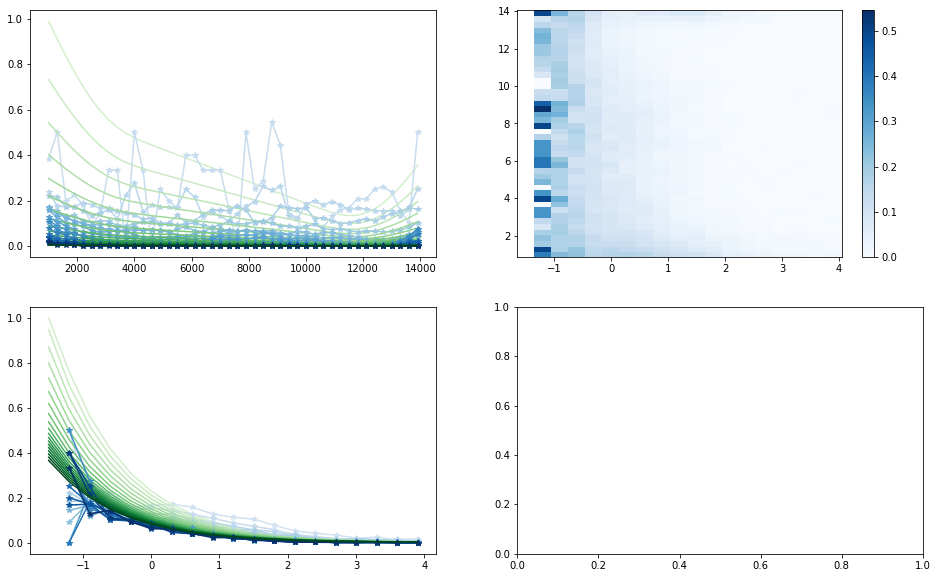

In [9]:
# cod estimators normal distribution
dh = ds_cs.dh
dd = ds_cs.dd
mu_h = ds_cs.mu_h # m
mu_d = ds_cs.mu_d
n_h = len(mu_h)
n_d = len(mu_d)
mu_h_ = np.append(mu_h - dh/2, mu_h.max() + dh/2) ## for pcolormesh
mu_d_ = np.append(mu_d - dd/2, mu_d.max() + dd/2) ## for pcolormesh

    
color= cm.Blues(np.linspace(.2,1, n_d))
color_ml= cm.Greens(np.linspace(.2,1, n_d))

def p_cs_model(h, d, param = [11e3, .5e-5, .1,  1.2]):
    y =  (np.exp(-1/((h - 7.5e3)/param[0])**2)  -  param[1] * h + param[2] )  * np.exp(-d) * param[3]
    y = y * (y>0) * ( y < 1) + (y > 1)
    return y


fig, ax = plt.subplots(2, 2, figsize = (16, 10))



for i, c, c_ml in zip(range(n_d), color, color_ml):
    ax[0,0].plot(mu_h, p_cs[:,i],
#                label = label,
               c = c, 
                marker = '*', 
               # ls = '--'
               )
    ax[0,0].plot(mu_h, p_cs_model(mu_h, mu_d[i], cs_params),
#                label = label,
               c = c_ml, 
#                 marker = '*', 
               # ls = '--'
               )
    
for i, c, c_ml in zip(range(n_h), color, color_ml):
    ax[1,0].plot(mu_d, p_cs[i,:],
#                label = label,
               c = c, 
                marker = '*', 
               # ls = '--'
               )
    ax[1,0].plot(mu_d, p_cs_model(mu_h_[i], mu_d, cs_params),
#                label = label,
               c = c_ml, 
               # ls = '--'
               )
im = ax[0,1].pcolormesh(mu_d_, mu_h_ * 1e-3, p_cs, cmap = cm.Blues)
plt.colorbar(im, ax=ax[0,1],
             # label = title[0]
             )


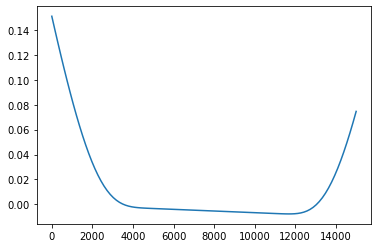

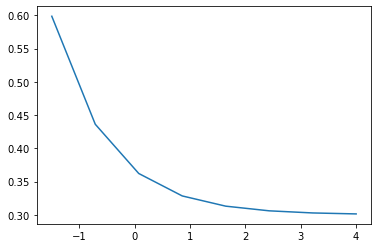

In [77]:
h  = np.linspace( 0, 15e3 , 100)
d = np.linspace(-1.5, 4, 8)

c = np.array([8e3])
y = np.exp(-1/((h - c[0])/11e3)**2)  - .3e-5 * h * np.exp(-1.5)
z = np.exp(-d) / 15 + .3

plt.plot(h,y)
plt.show()
plt.plot(d,z)

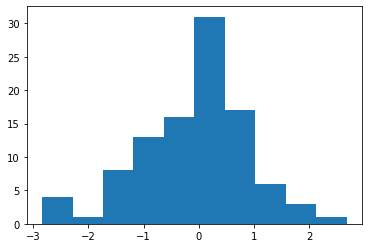

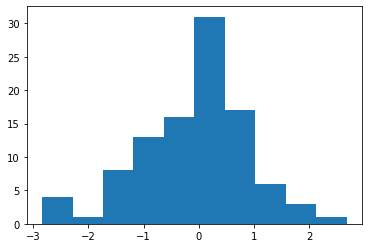

<a list of 10 Patch objects>

In [178]:
x = np.random.randn(100)
hist = plt.hist(x)
plt.show()

hist2 = plt.hist(hist[1][:-1], bins = hist[1], weights = hist[0])
plt.show()

hist[2]

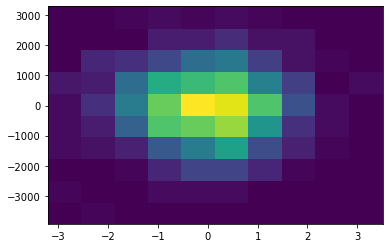

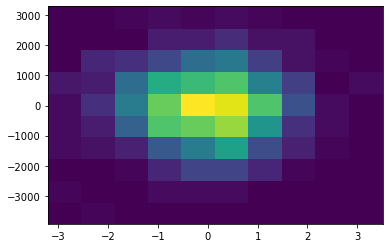

[[ 0.  1.  0.  2.  2.  2.  4.  0.  0.  0.]
 [ 1.  0.  0.  3.  5.  9.  5.  7.  0.  0.]
 [ 0.  0.  1.  6. 20. 27. 23.  9.  0.  1.]
 [ 0.  2.  7. 18. 47. 50. 40. 14.  5.  2.]
 [ 0.  2. 13. 27. 50. 65. 44. 23.  5.  1.]
 [ 0.  2. 13. 37. 55. 62. 47. 26.  8.  2.]
 [ 0.  0.  7. 15. 34. 47. 28. 12.  3.  1.]
 [ 0.  0.  1.  6.  9. 16. 12.  3.  3.  0.]
 [ 0.  0.  0.  1.  2.  2.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  2.  0.  0.  0.]]
(array([[ 0.,  1.,  0.,  2.,  2.,  2.,  4.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  3.,  5.,  9.,  5.,  7.,  0.,  0.],
       [ 0.,  0.,  1.,  6., 20., 27., 23.,  9.,  0.,  1.],
       [ 0.,  2.,  7., 18., 47., 50., 40., 14.,  5.,  2.],
       [ 0.,  2., 13., 27., 50., 65., 44., 23.,  5.,  1.],
       [ 0.,  2., 13., 37., 55., 62., 47., 26.,  8.,  2.],
       [ 0.,  0.,  7., 15., 34., 47., 28., 12.,  3.,  1.],
       [ 0.,  0.,  1.,  6.,  9., 16., 12.,  3.,  3.,  0.],
       [ 0.,  0.,  0.,  1.,  2.,  2.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,

array([-3928.37318898, -3206.27685903, -2484.18052908, -1762.08419913,
       -1039.98786918,  -317.89153923,   404.20479071,  1126.30112066,
        1848.39745061,  2570.49378056,  3292.59011051])

In [187]:
x, y = np.random.randn(1000), 1000 * np.random.randn(1000)
# print(hist)
freq, xedges, yedges, __ = plt.hist2d(x,y, bins = [10,10])
plt.show()


X, Y = np.meshgrid(xedges[:-1], yedges[:-1])
hist2 = plt.hist2d(X.flatten(), Y.flatten(), bins = [xedges, yedges], weights = freq.T.flatten())
plt.show()
print(freq)
print(hist2)
yedges

In [185]:


ds = xr.Dataset(
data_vars=dict(
),
)

ds['p_cs'] = (['x', 'y'], freq)
ds

<xarray.Dataset>
Dimensions:  (x: 10, y: 10)
Dimensions without coordinates: x, y
Data variables:
    p_cs     (x, y) float64 0.0 0.0 0.0 3.0 4.0 2.0 ... 3.0 3.0 0.0 1.0 1.0 0.0